<a href="https://colab.research.google.com/github/debizson/Mesi/blob/main/Bike_rent_model_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Useful python packages
import numpy as np  # numeric calculations

import pandas as pd  # data manipulation and storage

# Popular visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [41]:
# First, we are going to load our dataset with the hrlp of pandas
# it is going to return a special DataFrame object which holds our data
bike = pd.read_csv("https://raw.githubusercontent.com/ficstamas/FateML/1d501349b56c8c65e601b6ce40c56cca2a8050a5/notebooks/data/bike_rental_daily.csv")
bike  # we can easily display it as well

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [42]:
bike.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [43]:
# lets compose the list of features
features_numeric = ['instant', 'season' , 'yr', 'mnth', 'weekday',
                    'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered']
features_boolean = ['holiday', 'workingday']
target = 'cnt'
# You can concatonate lists by adding them together
features = features_numeric + features_boolean + [target]

In [44]:
bike = bike[features]
bike

,instant,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,holiday,workingday,cnt
0,1,1,0,1,6,2,0.344167,0.363625,0.805833,0.160446,331,654,0,0,985
1,2,1,0,1,0,2,0.363478,0.353739,0.696087,0.248539,131,670,0,0,801
2,3,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,0,1,1349
3,4,1,0,1,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,0,1,1562
4,5,1,0,1,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,0,1,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,4,2,0.254167,0.226642,0.652917,0.350133,247,1867,0,1,2114
727,728,1,1,12,5,2,0.253333,0.255046,0.590000,0.155471,644,2451,0,1,3095
728,729,1,1,12,6,2,0.253333,0.242400,0.752917,0.124383,159,1182,0,0,1341
729,730,1,1,12,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,0,0,1796


In [46]:
import warnings

def enforce_dtypes(df: pd.DataFrame, cols: list, dtype):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        df[cols] = df[cols].astype(dtype)

In [47]:
# we are going to change the string '?' to internal NaN values
# usually other packages rely on NaNs
for column in bike.columns:
    bike.loc[bike[column] == '?', column] = np.nan
    # Let's change the boolean values to boolean from string
    if column in features_boolean:
        bike.loc[bike[column].astype('float').astype('bool'), column] = True
        bike.loc[~bike[column].astype('float').astype('bool'), column] = False

enforce_dtypes(bike, features_numeric, float)
enforce_dtypes(bike, features_boolean, bool)

bike

<ipython-input-47-4558ceabb6eb>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bike.loc[bike[column].astype('float').astype('bool'), column] = True
<ipython-input-47-4558ceabb6eb>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  bike.loc[bike[column].astype('float').astype('bool'), column] = True


,instant,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,holiday,workingday,cnt
0,1.0,1.0,0.0,1.0,6.0,2.0,0.344167,0.363625,0.805833,0.160446,331.0,654.0,False,False,985.0
1,2.0,1.0,0.0,1.0,0.0,2.0,0.363478,0.353739,0.696087,0.248539,131.0,670.0,False,False,801.0
2,3.0,1.0,0.0,1.0,1.0,1.0,0.196364,0.189405,0.437273,0.248309,120.0,1229.0,False,True,1349.0
3,4.0,1.0,0.0,1.0,2.0,1.0,0.200000,0.212122,0.590435,0.160296,108.0,1454.0,False,True,1562.0
4,5.0,1.0,0.0,1.0,3.0,1.0,0.226957,0.229270,0.436957,0.186900,82.0,1518.0,False,True,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727.0,1.0,1.0,12.0,4.0,2.0,0.254167,0.226642,0.652917,0.350133,247.0,1867.0,False,True,2114.0
727,728.0,1.0,1.0,12.0,5.0,2.0,0.253333,0.255046,0.590000,0.155471,644.0,2451.0,False,True,3095.0
728,729.0,1.0,1.0,12.0,6.0,2.0,0.253333,0.242400,0.752917,0.124383,159.0,1182.0,False,False,1341.0
729,730.0,1.0,1.0,12.0,0.0,1.0,0.255833,0.231700,0.483333,0.350754,364.0,1432.0,False,False,1796.0


In [49]:
from sklearn.model_selection import train_test_split

# we are going to split it in a 0.7(train):0.1(dev):0.2(test) ratio
train, test = train_test_split(bike, train_size=0.8, random_state=0)
train, dev = train_test_split(train, train_size=int(len(bike)*0.7), random_state=0)
len(train), len(dev), len(test)

(511, 73, 147)

In [51]:
len(train)/len(bike)

0.6990424076607387

In [53]:
from sklearn.impute import SimpleImputer  # lets load the imputer object from sklearn

# 'strategy' paramter defines how we wish to replace missing values
# 'missing_values' a representation of the missing value (yes, we could just use the '?' symbol)
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

imp_mean = SimpleImputer(strategy='most_frequent', missing_values=np.nan)

# fit_transform() calculates the most frequent value (fit) and applies it on our DataFrame (transform)
train_imputed = imp_mean.fit_transform(train)
dev_imputed = imp_mean.transform(dev)
test_imputed = imp_mean.transform(test)

# sadly, sklearn returns a numpy array and not a DataFrame, so we have to fix that
train = pd.DataFrame(data=train_imputed, columns=train.columns, index=train.index)
dev = pd.DataFrame(data=dev_imputed, columns=dev.columns, index=dev.index)
test = pd.DataFrame(data=test_imputed, columns=test.columns, index=test.index)

enforce_dtypes(train, features_boolean , bool)
enforce_dtypes(dev, features_boolean , bool)
enforce_dtypes(test, features_boolean , bool)

train

,instant,season,yr,mnth,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,holiday,workingday,cnt
701,702.0,4.0,1.0,12.0,0.0,2.0,0.347500,0.359208,0.823333,0.124379,892.0,3757.0,False,False,4649.0
659,660.0,4.0,1.0,10.0,0.0,1.0,0.464167,0.456429,0.510000,0.166054,2132.0,4692.0,False,False,6824.0
608,609.0,3.0,1.0,8.0,5.0,1.0,0.764167,0.689400,0.587500,0.168533,1433.0,5917.0,False,True,7350.0
597,598.0,3.0,1.0,8.0,1.0,2.0,0.635833,0.595967,0.734167,0.129979,1026.0,5504.0,False,True,6530.0
405,406.0,1.0,1.0,2.0,5.0,2.0,0.280833,0.293558,0.540000,0.116929,227.0,3604.0,False,True,3831.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,379.0,1.0,1.0,1.0,6.0,1.0,0.180000,0.183087,0.457500,0.187183,333.0,2160.0,False,False,2493.0
240,241.0,3.0,0.0,8.0,1.0,1.0,0.636667,0.607958,0.554583,0.159825,729.0,3905.0,False,True,4634.0
29,30.0,1.0,0.0,1.0,0.0,1.0,0.216522,0.250322,0.722174,0.073983,140.0,956.0,False,False,1096.0
20,21.0,1.0,0.0,1.0,5.0,1.0,0.177500,0.157833,0.457083,0.353242,75.0,1468.0,False,True,1543.0


Average weekday: 2.9941291585127203


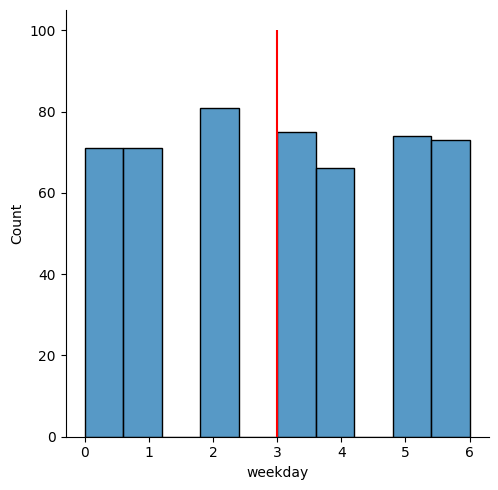

In [55]:
# let's have a look at the weekdays distribution of paricipents
mean_weekday = train['weekday'].mean()
sns.displot(data=train, kind="hist", x="weekday")
plt.vlines(mean_weekday, 0, 100, "red") # this is going to draw a vertical red line at the average weekday
print(f"Average weekday: {mean_weekday}")

# The most coomon day of rents is on Thuesday(2).

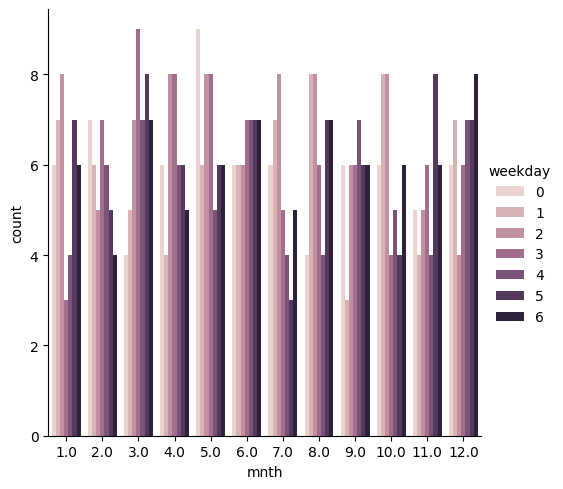

In [75]:
# It can show the weekday rents in every months.
#
sns.catplot(data=train, kind="count", x="mnth", hue="weekday")

<Axes: xlabel='season', ylabel='registered'>

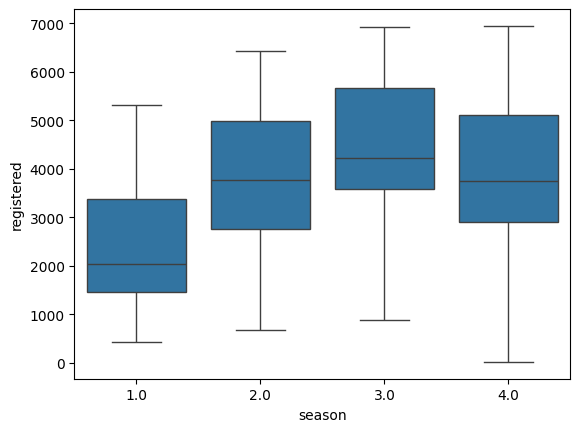

In [78]:
# The most common rent season is fall. Median is at 4000 rents in that season.
#
sns.boxplot(x="season", y="registered", data=train)

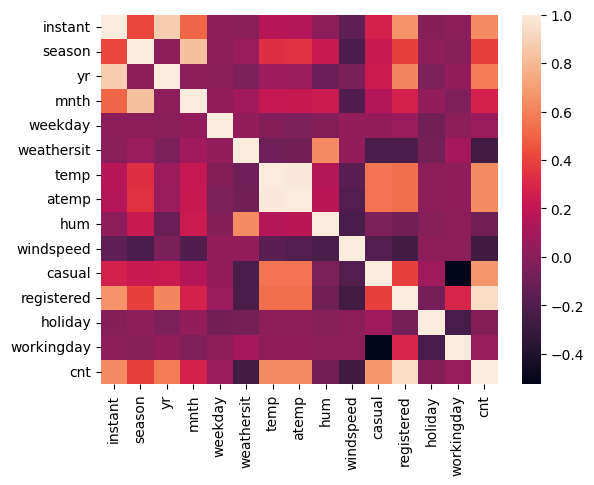

In [79]:
# Create a heatmap of the correlation between variables

corr = train.corr()

sns.heatmap(corr)

# Show the plot

plt.show()


# There is some positive correlation between instant and month or temp and casual.
# And negative correlation between casual and workingday. So on workingdays there
# are revers amount of casual rents.